<a href="https://colab.research.google.com/github/muzaffarizamuddin/Data-Science-Project/blob/main/P166246_Week14_TimeSeries_20260108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 14: Time Series**
Please refer to the textbook: "Python for Data Analysis" by Wes McKinney for details of this topic on **Chapter 11**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Time Series**

A **time series** is an ordered sequence of observations **indexed by time**.

Key characteristics:
- **Temporal order matters**
- **Observations may be dependent over time**
- **Often exhibit trend, seasonality, and noise**

Time series data are central to forecasting, monitoring, and temporal pattern discovery
in domains such as finance, economics, climate, and health.


In [ ]:
# Import NumPy, Pandas, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **14.1 Date and Time Data Types and Tools**


## ***Standard date accepted worldwide***:
## We have different date format:
    * 06/01/2026
    * 6 January 2026
    * 01/06/26 (US format)
    *.....

Dates may appear in many formats across systems and datasets.
In data analysis, the **ISO 8601 format (YYYY-MM-DD; ***2026-01-08***)** is preferred because it is:

- Unambiguous
- Chronologically sortable
- Widely supported by analytical tools

In practice, pandas handles most date parsing automatically.

## **Python Datetime vs pandas Time Series**

Python's `datetime` module provides low-level date and time objects.

In real-world time series analysis, **pandas abstracts most datetime complexity**, including:
- parsing date strings
- indexing by time
- resampling and alignment
- handling missing timestamps

We will therefore focus primarily on pandas-native time series tools.


In [ ]:
# Example: converting string dates to pandas datetime
dates = ['1998-07-01 12:00:00', '2000-02-08 00:00:00']
pd.to_datetime(dates)

DatetimeIndex(['1998-07-01 12:00:00', '2000-02-08 00:00:00'], dtype='datetime64[ns]', freq=None)

> pandas automatically **recognises most common datetime formats**.

> Explicit format specification is only required for rare cases.

## **Coordinated Universal Time -> UTC**
Malaysia time is 8 hrs ahead of UTC
* +8:00:00 UTC

## ***Why UTC?***
UTC provides a **global reference time**, ensuring **timestamps (date and time)** from different
regions can be compared and combined correctly.

In time series analysis, storing timestamps in UTC **avoids ambiguity**
when **working across time zones**.

- Big company -> MNC -> Malaysia, Japan, USA

## Time Series in pandas

In pandas, the fundamental time series object is a **Series**
indexed by timestamps (`DatetimeIndex`).

This structure enables powerful operations such as:
- time-based slicing
- resampling
- rolling computations (stock market)

In [ ]:
# Import datetime
from datetime import datetime

# Creates a list of specific calendar dates
dates = [
    datetime(2026, 1, 2),
    datetime(2026, 1, 5),
    datetime(2026, 1, 7),
    datetime(2026, 1, 8),
    datetime(2026, 1, 10),
    datetime(2026, 1, 12),
]

# Creates a list of random numbers
# Centered around 0
# Some are positive, some are negative
values = np.random.randn(len(dates))

# Create a pandas series
ts = pd.Series(values, index=dates)
ts


,0
2026-01-02,-0.208320
2026-01-05,0.869925
2026-01-07,0.580798
2026-01-08,-2.134133
2026-01-10,-0.114971
2026-01-12,1.400795


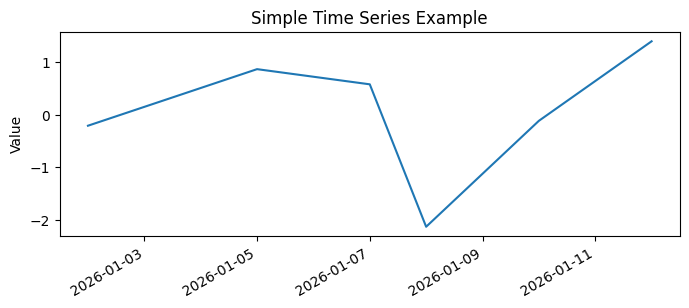

In [ ]:
# Draws a line chart that shows how values change over time
ts.plot(figsize=(8, 3), title="Simple Time Series Example")
plt.ylabel("Value")
plt.show()


This indexed structure allows pandas to interpret and visualise data
according to time automatically.


# **14.2 Time Series Basics**
In pandas, a **time series** is typically represented as a `Series`
(or `DataFrame`) indexed by timestamps (`DatetimeIndex`).

This structure allows pandas to understand and operate on data
based on time.

In [ ]:
# A timestamp example
rng = np.random.RandomState(12345)

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

# Create a time series ts
ts = pd.Series(rng.standard_normal(6), index = dates)
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


The timestamps form the **index** of the Series.

This index:
- defines *when* each observation occurred
- enables time-based selection and alignment

In [ ]:
# Accessing the DatetimeIndex
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

#### **Indexing, Selection, Subsetting**

In [ ]:
# Accessing individual index
ts.index[2]

Timestamp('2011-01-07 00:00:00')

In [ ]:
# Value recorded on 12 January 2011
ts['2011-01-12']

np.float64(1.3934058329729904)

In [ ]:
# Show all the data from 6 January 2011 onwards
# although 2011-01-06 is not in the Series
ts['2011-01-06':]

,0
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


## **Notes:**
In **pandas time series slicing**:
- **end dates are inclusive**
- timestamps do not need to exist exactly
- we can ask for a date range even if some of those dates are not actually in the data.
- pandas will still return the data that falls within that time range.

## **Irregular vs Regular Time Series**
The previous example is **irregular**:
- observations are not evenly spaced in time

Many time series, however, are **regular**, such as daily or monthly data.


In [ ]:
# Set a seed number for reproducibility
rng = np.random.RandomState(12345)

# date range - range of date
# period - a time span [days, months, years, minutes, hours, seconds]
# Create a longer time series example
longer_ts = pd.Series(
    rng.standard_normal(1000),
    index=pd.date_range("2000-01-01", periods = 1000, freq="D")
)
longer_ts

,0
2000-01-01,-0.204708
2000-01-02,0.478943
2000-01-03,-0.519439
2000-01-04,-0.555730
2000-01-05,1.965781
...,...
2002-09-22,0.107657
2002-09-23,-0.139298
2002-09-24,-1.159926
2002-09-25,0.618965


## **Calendar-Based Slicing**

In [ ]:
# Accessing only the year 2001 data
longer_ts['2001']

,0
2001-01-01,-1.610841
2001-01-02,-1.026621
2001-01-03,1.241573
2001-01-04,-0.156760
2001-01-05,-2.449096
...,...
2001-12-27,1.578948
2001-12-28,0.000369
2001-12-29,0.900885
2001-12-30,-0.454869


In [ ]:
# Accessing the particular year and month
longer_ts['2001-06']

,0
2001-06-01,0.545680
2001-06-02,0.235477
2001-06-03,0.111835
2001-06-04,-1.251504
2001-06-05,-2.949343
2001-06-06,0.634634
2001-06-07,0.124157
2001-06-08,1.297622
2001-06-09,-1.686933
2001-06-10,1.089539


In [ ]:
# Accessing info from 2001-06 to 2002
# Pandas treats the end of the specified period inclusively

longer_ts['2001-06':'2002']

,0
2001-06-01,0.545680
2001-06-02,0.235477
2001-06-03,0.111835
2001-06-04,-1.251504
2001-06-05,-2.949343
...,...
2002-09-22,0.107657
2002-09-23,-0.139298
2002-09-24,-1.159926
2002-09-25,0.618965


## **Note**:
pandas understands **calendar logic**, not just string matching.
- In pandas time series, **the ending index is inclusive**

## **Truncating a Time Series**

In [ ]:
# Keeps all data up to 31 December 2001
# Throws away everything after that date
longer_ts.truncate(after='2001-12-29')

,0
2000-01-01,-0.204708
2000-01-02,0.478943
2000-01-03,-0.519439
2000-01-04,-0.555730
2000-01-05,1.965781
...,...
2001-12-25,-0.079266
2001-12-26,-1.403293
2001-12-27,1.578948
2001-12-28,0.000369


## **Note:**
**`truncate()`** is useful when we want to **cut data at a time boundary**
without specifying start and end manually.

## **Multivariate Time Series (DataFrame)**
- Multi + Variate
- **Multiple Variable**

In [ ]:
# Another example - DataFrame timestamp
# Refer to the calendar
rng = np.random.RandomState(12345)

# Dates
dates = pd.date_range('2000-01-01', periods = 100, freq = 'W-WED')

# Create a data frame
long_df = pd.DataFrame(
    rng.standard_normal((100, 4)),
    index = dates,
    columns = ['Petal_len', 'Petal_color', 'Petal_width', 'Singapore']
)

long_df.head()

,Petal_len,Petal_color,Petal_width,Singapore
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-12,1.965781,1.393406,0.092908,0.281746
2000-01-19,0.769023,1.246435,1.007189,-1.296221
2000-01-26,0.274992,0.228913,1.352917,0.886429
2000-02-02,-2.001637,-0.371843,1.669025,-0.438570


In [ ]:
# Display the content
long_df

,Petal_len,Petal_color,Petal_width,Singapore
2000-01-05,-0.204708,0.478943,-0.519439,-0.555730
2000-01-12,1.965781,1.393406,0.092908,0.281746
2000-01-19,0.769023,1.246435,1.007189,-1.296221
2000-01-26,0.274992,0.228913,1.352917,0.886429
2000-02-02,-2.001637,-0.371843,1.669025,-0.438570
...,...,...,...,...
2001-10-31,0.564561,-0.190481,-0.916934,-0.975814
2001-11-07,2.212303,0.073931,1.818595,-1.581531
2001-11-14,-0.774363,0.552936,0.106061,3.927528
2001-11-21,-0.255126,0.854137,-0.364807,0.131102


**Time-Based Selection in DataFrames**

In [ ]:
# Using the label - get data until July 2001 data
long_df['2000-01-25':'2001-07']

,Petal_len,Petal_color,Petal_width,Singapore
2000-01-26,0.274992,0.228913,1.352917,0.886429
2000-02-02,-2.001637,-0.371843,1.669025,-0.438570
2000-02-09,-0.539741,0.476985,3.248944,-1.021228
2000-02-16,-0.577087,0.124121,0.302614,0.523772
2000-02-23,0.000940,1.343810,-0.713544,-0.831154
...,...,...,...,...
2001-06-27,-0.914979,-0.478964,1.047184,0.923948
2001-07-04,-0.114150,0.405802,0.288452,-0.434788
2001-07-11,0.358756,-0.388245,2.128746,1.409605
2001-07-18,-0.105434,0.700428,2.092852,-0.136972


## **Note:**
The same time-based slicing rules apply to **Series and DataFrames**.

#### **Time Series with Duplicate Indices**
Some real-world data contain **multiple observations at the same timestamp**.


In [ ]:
# Duplicated indexes
dates = pd.DatetimeIndex(
    ["2000-01-01", "2000-01-02", "2000-01-02",
     "2000-01-02", "2000-01-03"
])

# Create a duplicated time series
dup_ts = pd.Series(range(5), index = dates)
dup_ts

,0
2000-01-01,0
2000-01-02,1
2000-01-02,2
2000-01-02,3
2000-01-03,4


## **Handling Duplicate Indices**

In [ ]:
# Check index uniqueness
dup_ts.index.is_unique

False

In [ ]:
# Indexing
dup_ts['2000-01-02']

,0
2000-01-02,1
2000-01-02,2
2000-01-02,3


In [ ]:
# Display dup_ts content
dup_ts

,0
2000-01-01,0
2000-01-02,1
2000-01-02,2
2000-01-02,3
2000-01-03,4


In [ ]:
# grouby and get the mean
# level=0 refers to the first (outermost) level of MultiIndex data
dup_ts.groupby(level=0).median()

,0
2000-01-01,0.0
2000-01-02,2.0
2000-01-03,4.0


## **Note:**
Grouping by the timestamp allows **aggregation (get summary)** when duplicates exist.

# **14.3 Date Ranges, Frequencies, and Offsets**
Time series analysis often requires **creating regular sequences of dates**.

- pandas provides flexible tools to generate date ranges with different
frequencies (daily, monthly, hourly, etc.).

### **Generating a Simple Date Range**

In [ ]:
# Create a DateTimeIndex
dates = pd.date_range('2012-04-01', '2012-06-01')
dates

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

### **Notes:**
By default:
- frequency = daily (`'D'`)
- both start and end dates are included


### **Date Ranges with Number of Periods**

In [ ]:
# State number of periods: start
# 'ME' : Month End
pd.date_range(start = '2026-01', periods = 5, freq='ME')

DatetimeIndex(['2026-01-31', '2026-02-28', '2026-03-31', '2026-04-30',
               '2026-05-31'],
              dtype='datetime64[ns]', freq='ME')

#### **Note:**
This creates **month-end dates**, which are common in financial
and economic time series.

### **Date Ranges with End Date**

In [ ]:
# State number of periods: end
pd.date_range(end = '2012-06-01', periods = 3, freq='ME')

DatetimeIndex(['2012-03-31', '2012-04-30', '2012-05-31'], dtype='datetime64[ns]', freq='ME')

#### **Notes**:
We can specify:
- start + periods, or
- end + periods  
depending on the problem context.

### ***Common time series frquencies***

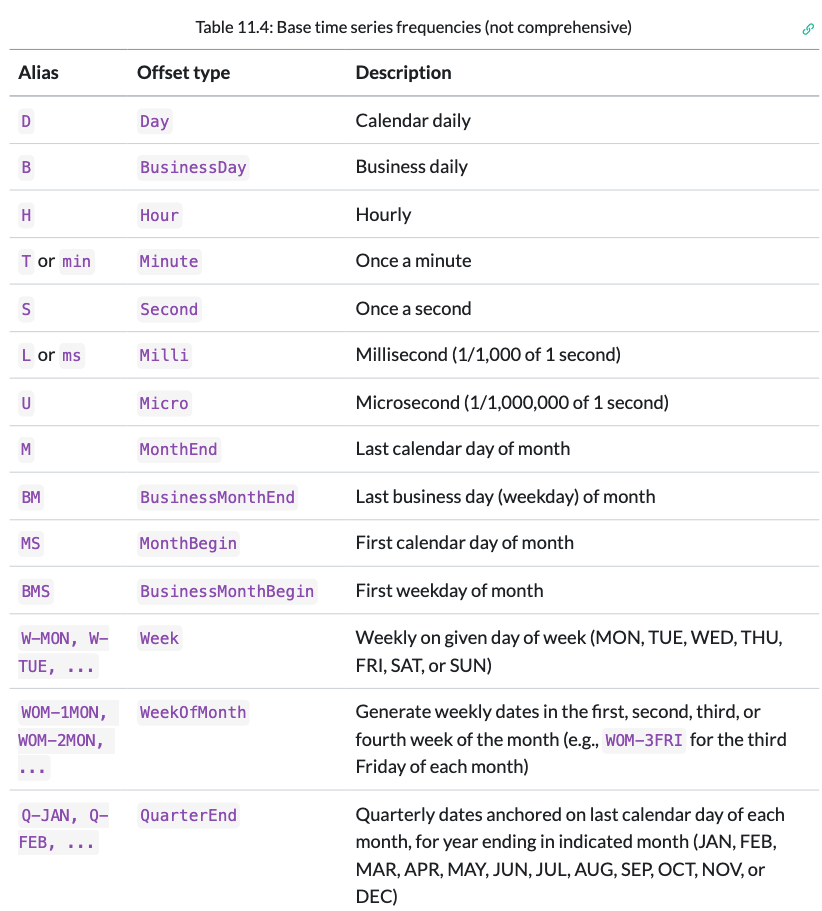

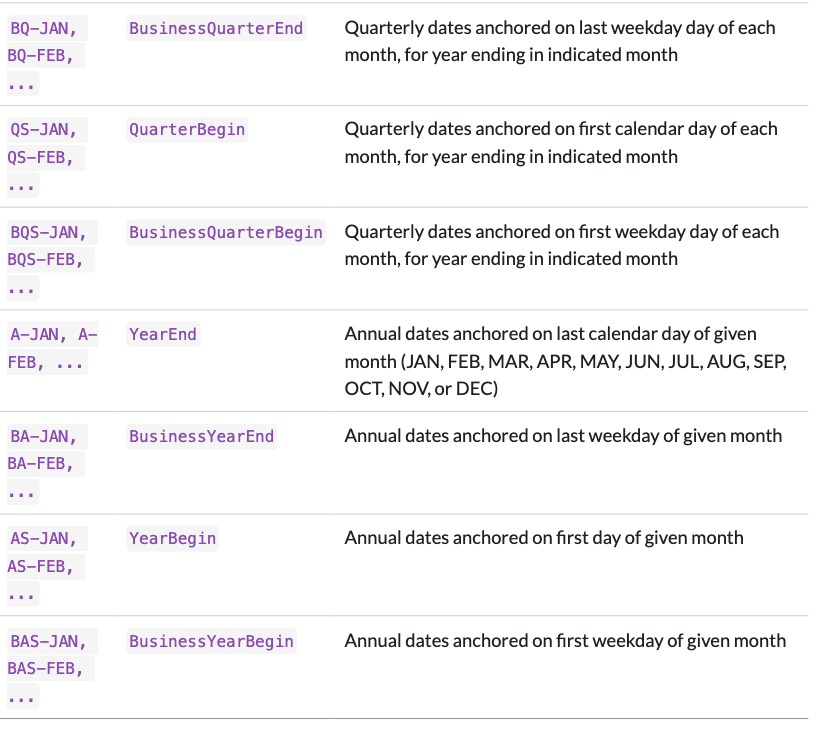

### **Business Month-End Example -> `BME`**

In [ ]:
# "BME" frequency: Last business day (weekday) of month
pd.date_range('2026-01-01', '2026-03-01', freq = 'BME')

DatetimeIndex(['2026-01-30', '2026-02-27'], dtype='datetime64[ns]', freq='BME')

#### **Note**:
Business month-end excludes weekends and holidays,
making it suitable for financial data.

### **Time Component Preservation**

In [ ]:
# pandas.date_range() by default preserves the time (if any)
# of the start or end timestamp
# default freq is 'D'
pd.date_range('2024-01-03 11:15:27', periods = 5)

DatetimeIndex(['2024-01-03 11:15:27', '2024-01-04 11:15:27',
               '2024-01-05 11:15:27', '2024-01-06 11:15:27',
               '2024-01-07 11:15:27'],
              dtype='datetime64[ns]', freq='D')

#### **Note**:
pandas preserves the **time component** unless specified otherwise

### **Normalising to Midnight**

In [ ]:
# Normalized to midnight
pd.date_range('2024-01-03 11:16:28', periods = 3, normalize=True)

DatetimeIndex(['2024-01-03', '2024-01-04', '2024-01-05'], dtype='datetime64[ns]', freq='D')

#### **Note**:
**`normalize=True`** resets all timestamps to **midnight (00:00:00)**.
This is useful **when only dates (not times) matter**.

#### **Frequency Strings vs Offset Objects**
In practice, **frequency `strings`** are preferred for clarity.
Date offset objects are useful but less commonly needed.

### **Multiple-Hour Frequency**

In [ ]:
# Putting an integer before the base frequency creates a multiple (multiply)
# In this case, freq="4H" -> 4 * Hour as in the previous example
pd.date_range('2024-01-03', '2024-01-05', freq = '4h')

DatetimeIndex(['2024-01-03 00:00:00', '2024-01-03 04:00:00',
               '2024-01-03 08:00:00', '2024-01-03 12:00:00',
               '2024-01-03 16:00:00', '2024-01-03 20:00:00',
               '2024-01-04 00:00:00', '2024-01-04 04:00:00',
               '2024-01-04 08:00:00', '2024-01-04 12:00:00',
               '2024-01-04 16:00:00', '2024-01-04 20:00:00',
               '2024-01-05 00:00:00'],
              dtype='datetime64[ns]', freq='4h')

#### **Note**:
This creates timestamps every 4 hours.

### **Custom Combined Frequency**

In [ ]:
# Pass as frequency strings
pd.date_range('2024-01-03', periods=5, freq = '1h37min')

DatetimeIndex(['2024-01-03 00:00:00', '2024-01-03 01:37:00',
               '2024-01-03 03:14:00', '2024-01-03 04:51:00',
               '2024-01-03 06:28:00'],
              dtype='datetime64[ns]', freq='97min')

### **Note**:
Custom frequencies are possible but rarely required in standard analyses.


#### **Week-of-Month Dates (WOM)**

In [ ]:
# “week of month”
# freq="WOM-3FRI" -> week of the month, 3rd Friday
pd.date_range(
    '2026-06-11', '2026-09-01',
    freq='WOM-3FRI'
)

DatetimeIndex(['2026-06-19', '2026-07-17', '2026-08-21'], dtype='datetime64[ns]', freq='WOM-3FRI')

### **Note**:
This generates dates such as **the 3rd Friday of each month**.
- Useful in specialised financial or scheduling applications.

# **14.4 Time Zone Handling**

Time zones become important when time series data are collected
**across different geographical locations**.

pandas provides tools to:
- **localize naive timestamps**
- **convert between time zones**
- **handle daylight saving time (DST) automatically**

### **Coordinated Universal Time (UTC)**

UTC is a geography-independent global time standard.

In practice:
- **timestamps are often stored in UTC (UTC format -> time zone naive)**
- converted to local time only when needed

#### **Time Zone–Naive Time Series**

In [ ]:
# By default, time series in pandas are time zone naive
rng = np.random.RandomState(12345)

dates = pd.date_range('2026-01-06', periods = 10)

# Create a time series data
ts = pd.Series(rng.standard_normal(len(dates)), index = dates)
ts

,0
2026-01-06,-0.204708
2026-01-07,0.478943
2026-01-08,-0.519439
2026-01-09,-0.555730
2026-01-10,1.965781
2026-01-11,1.393406
2026-01-12,0.092908
2026-01-13,0.281746
2026-01-14,0.769023
2026-01-15,1.246435


### **Note**:
By default, pandas timestamps are **time zone–naive**.
- **DO NOT** know which country or time zone they belong to

### **Localizing to UTC**

In [ ]:
# Conversion from naive to localized
# localizing to the "UTC" time zone
# "+00:00" represents the UTC offset associated with the timestamp
ts_utc = ts.tz_localize('UTC')
ts_utc

,0
2026-01-06 00:00:00+00:00,-0.204708
2026-01-07 00:00:00+00:00,0.478943
2026-01-08 00:00:00+00:00,-0.519439
2026-01-09 00:00:00+00:00,-0.555730
2026-01-10 00:00:00+00:00,1.965781
2026-01-11 00:00:00+00:00,1.393406
2026-01-12 00:00:00+00:00,0.092908
2026-01-13 00:00:00+00:00,0.281746
2026-01-14 00:00:00+00:00,0.769023
2026-01-15 00:00:00+00:00,1.246435


### **Note**:
**`tz_localize()`** assigns a time zone **without changing the clock time**.


### **Converting to Another Time Zone**

In [ ]:
# Convert to another time zone with tz_convert
ts_ny = ts_utc.tz_convert('America/New_York')
ts_ny

,0
2026-01-05 19:00:00-05:00,-0.204708
2026-01-06 19:00:00-05:00,0.478943
2026-01-07 19:00:00-05:00,-0.519439
2026-01-08 19:00:00-05:00,-0.555730
2026-01-09 19:00:00-05:00,1.965781
2026-01-10 19:00:00-05:00,1.393406
2026-01-11 19:00:00-05:00,0.092908
2026-01-12 19:00:00-05:00,0.281746
2026-01-13 19:00:00-05:00,0.769023
2026-01-14 19:00:00-05:00,1.246435


### **Note:**
**`tz_convert()`** changes the **clock time** to reflect a different time zone.


### **Daylight Saving Time (DST)**

pandas automatically handles daylight saving transitions
when converting between time zones.

This prevents common errors such as:
- missing hours
- duplicated timestamps

### **DST in Action**
- Season: Spring "Forward" -> -4hrs
- **Season: Fall "backward" -> -5hrs**

In [ ]:
# Daylight saving time (DST)
dates = pd.date_range('2026-11-01', periods = 5)

# Create a time series data
ts = pd.Series(rng.standard_normal(len(dates)), index = dates)
ts_utc = ts.tz_localize('UTC')
ts_utc

ts_eastern = ts_utc.tz_convert('America/New_York')
ts_eastern

,0
2026-10-31 20:00:00-04:00,1.007189
2026-11-01 19:00:00-05:00,-1.296221
2026-11-02 19:00:00-05:00,0.274992
2026-11-03 19:00:00-05:00,0.228913
2026-11-04 19:00:00-05:00,1.352917


### **Note:**
Notice how the time offset changes automatically during DST

**Example with DST (United States)**

New York:
- Fall → UTC-5
- Spring → UTC-4

### **Converting Between Multiple Time Zones**

In [ ]:
# Convert to other time zone
ts_eastern.tz_convert('Europe/Berlin')

,0
2026-11-01 01:00:00+01:00,1.007189
2026-11-02 01:00:00+01:00,-1.296221
2026-11-03 01:00:00+01:00,0.274992
2026-11-04 01:00:00+01:00,0.228913
2026-11-05 01:00:00+01:00,1.352917


### **Note:**
Conversion always preserves the **same instant in time**.
- The **time on the clock is different**, but the **moment in reality is the same**.

In [ ]:
# Convert to other time zone "Asia/Kuala_Lumpur"
ts_utc.tz_convert('Asia/Kuala_Lumpur')

,0
2026-11-01 08:00:00+08:00,1.007189
2026-11-02 08:00:00+08:00,-1.296221
2026-11-03 08:00:00+08:00,0.274992
2026-11-04 08:00:00+08:00,0.228913
2026-11-05 08:00:00+08:00,1.352917


### **Note:**
Asian time zones typically do not observe daylight saving time,
making conversions simpler.

#### **Timestamp Objects with Time Zones**


In [ ]:
# Time stamp
# time zone naive
stamp = pd.Timestamp("2011-03-05 04:00", tz="UTC")
stamp.tz_convert("America/New_York")

Timestamp('2011-03-04 23:00:00-0500', tz='America/New_York')

#### **Combining Time Series with Different Time Zones**
If two time series with different time zones are combined, the result will be UTC.

In [ ]:
# Example
# "B" -> Business daily
rng = np.random.RandomState(12345)
dates = pd.date_range("2012-03-07 09:30", periods=6, freq="B")
dates

# Create a time series
ts = pd.Series(rng.standard_normal(len(dates)), index=dates)

# Create different localize time zone
ts_KL = ts.tz_localize("Asia/Kuala_Lumpur")
ts_moscow = ts_KL.tz_convert("Europe/Moscow")

# Display content for London and Moscow
print('Kuala Lumpur:', ts_KL)
print('Moscow:', ts_moscow)

# Combining time series with different time zones
ts_KL + ts_moscow

Kuala Lumpur: 2012-03-07 09:30:00+08:00   -0.204708
2012-03-08 09:30:00+08:00    0.478943
2012-03-09 09:30:00+08:00   -0.519439
2012-03-12 09:30:00+08:00   -0.555730
2012-03-13 09:30:00+08:00    1.965781
2012-03-14 09:30:00+08:00    1.393406
dtype: float64
Moscow: 2012-03-07 05:30:00+04:00   -0.204708
2012-03-08 05:30:00+04:00    0.478943
2012-03-09 05:30:00+04:00   -0.519439
2012-03-12 05:30:00+04:00   -0.555730
2012-03-13 05:30:00+04:00    1.965781
2012-03-14 05:30:00+04:00    1.393406
dtype: float64


,0
2012-03-07 01:30:00+00:00,-0.409415
2012-03-08 01:30:00+00:00,0.957887
2012-03-09 01:30:00+00:00,-1.038877
2012-03-12 01:30:00+00:00,-1.111461
2012-03-13 01:30:00+00:00,3.931561
2012-03-14 01:30:00+00:00,2.786812


In [ ]:
-0.204708 + (-0.204708)

-0.409416

### **Note:**
When combining time series with different time zones,
pandas aligns them in **UTC internally**.

# **14.5 Periods and Period Arithmetic**
A **Period** represents a ***time span*** (e.g. a month, quarter, or year),
rather than a specific moment in time.

Periods are commonly used in:
- financial reporting
- economic indicators
- quarterly or yearly summaries

### **Creating a Period**

In [ ]:
# Represents the full time span from January 1, 2011,
# to December 31, 2011, inclusive
p = pd.Period("2011", freq="Y")
p

Period('2011', 'Y-DEC')

### **Note:**
This represents the **entire year 2011**, not a specific date.

### **Period Arithmetic**

In [ ]:
# Plus 5 years
p + 5

Period('2016', 'Y-DEC')

In [ ]:
# Minus 2 years
p - 2

Period('2009', 'Y-DEC')

### **Difference Between Periods**

In [ ]:
# If two periods have the same frequency, their difference is the
# number of units between them as a date offset
pd.Period("2014", freq="Y-DEC") - p

<3 * YearEnds: month=12>

### **Note:**
The result is the **number of periods between two time spans**.

### **Period Ranges**

In [ ]:
# Regular ranges of periods
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

### **Periods as an Index**

In [ ]:
# PeriodIndex class stores a sequence of periods
# can serve as an axis index in any pandas data structure
rng = np.random.RandomState(12345)
values = rng.randn(len(periods))
pd.Series(values, index=periods)

,0
2000-01,-0.204708
2000-02,0.478943
2000-03,-0.519439
2000-04,-0.555730
2000-05,1.965781
2000-06,1.393406


#### **Converting Period Frequency**
using ***asfreq()*** function to convert to another frequency

In [ ]:
# Convert into a monthly period; start
# p -> year 2011
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [ ]:
# Convert into a monthly period; end
p.asfreq("M", how="end")

Period('2011-12', 'M')

### **Note:**
**`asfreq()`** converts a period to another frequency,
choosing either the **start** or **end** of the time span.

#### **Timestamp → Period Conversion**

In [ ]:
# Example
rng = np.random.RandomState(123)
dates = pd.date_range("2000-01-01", periods=3, freq="ME")

# Convert timestamp to period
ts = pd.Series(rng.randn(3), index=dates)
ts

,0
2000-01-31,-1.085631
2000-02-29,0.997345
2000-03-31,0.282978


In [ ]:
# Month-end dates imply monthly data
# Hence the return the month data when converting to period
ts.to_period()

,0
2000-01,-1.085631
2000-02,0.997345
2000-03,0.282978


### **Period → Timestamp Conversion**
* **timestamp -> date (YYYY-MM-DD) & time (HH:MM:SS)**

In [ ]:
# Groups data into time blocks (like months)
# Then assigns each block a representative date at the end of that block
ts.to_period().to_timestamp(how="end")

,0
2000-01-31 23:59:59.999999999,-1.085631
2000-02-29 23:59:59.999999999,0.997345
2000-03-31 23:59:59.999999999,0.282978


### **Note:**
Converting back to timestamps requires choosing
a representative point within the period.

### **Duplicate Periods Are Allowed**

In [ ]:
# Allow duplicate periods
rng = np.random.RandomState(12345)
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(rng.standard_normal(6), index=dates)
ts2

,0
2000-01-29,-0.204708
2000-01-30,0.478943
2000-01-31,-0.519439
2000-02-01,-0.555730
2000-02-02,1.965781
2000-02-03,1.393406


In [ ]:
# Convert to month periods
ts2.to_period("M")

,0
2000-01,-0.204708
2000-01,0.478943
2000-01,-0.519439
2000-02,-0.555730
2000-02,1.965781
2000-02,1.393406


### **Note:**
Multiple timestamps can belong to the same period,
which is common in real data.

### **Creating PeriodIndex from Fields (real world data)**

In [ ]:
# Example data - macrodata.csv
# link: https://bit.ly/3X2jfu8
data = pd.read_csv("https://bit.ly/3X2jfu8")

# Creating an Index
# fields here referring to column name
index = pd.PeriodIndex.from_fields(
    year=data["year"],
    quarter=data["quarter"],
    freq="Q"
)

# Display top cpi data
data.index = index
data["cpi"].head()


,cpi
1959Q1,28.98
1959Q2,29.15
1959Q3,29.35
1959Q4,29.37
1960Q1,29.54


In [ ]:
# Display content for data
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### **Simple Analysis with Period Data**

In [ ]:
# Average cpi value
data["cpi"].mean()

np.float64(105.07578817733989)

In [ ]:
top10_percentile = data["cpi"].quantile(0.10)
top90_percentile = data["cpi"].quantile(0.90)

print(f"The 10th percentile for CPI is: {top10_percentile:.2f}")
print(f"The 90th percentile for CPI is: {top90_percentile:.2f}")

The 10th percentile for CPI is: 30.96
The 90th percentile for CPI is: 190.46


# **Exercise for final exam**
- Given the cpi, i want to know what is the top 10%
- Given the cpi, i want to know what is the bottom 10%

- top 10 percentile, top 90 percentile

# **14.6 Resampling and Frequency Conversion**
Resampling changes the **time frequency** of a time series.

Two main cases:
- **Downsampling**: higher → lower frequency (e.g. daily → monthly)
- **Upsampling**: lower → higher frequency (e.g. weekly → daily)

In [ ]:
# Example dataset
rng = np.random.default_rng(45)

dates = pd.date_range("2000-01-01", periods=100, freq="D")
ts = pd.Series(rng.standard_normal(len(dates)), index=dates)

ts.head()

,0
2000-01-01,-0.457865
2000-01-02,-0.622859
2000-01-03,0.135290
2000-01-04,0.843903
2000-01-05,-0.148499


### **Downsampling (Daily → Monthly)**

In [ ]:
# Monthly mean
monthly_mean = ts.resample("ME").mean()
monthly_mean

,0
2000-01-31,-0.247141
2000-02-29,0.050911
2000-03-31,-0.199702
2000-04-30,-0.049990


### **Note:**
Downsampling requires an **aggregation function**
(e.g. mean, sum, median).

### **Why Aggregation Is Needed**
When downsampling:
- multiple observations fall into one time bin
- pandas must combine them into a single value

Common aggregations:
- `.mean()`
- `.sum()`
- `.max()`


### **Upsampling (Weekly → Daily)**

In [ ]:
# Example dataframe
rng = np.random.RandomState(12)
frame = pd.DataFrame(
    rng.standard_normal((2, 4)),
    index=pd.date_range("2000-01-01", periods=2,freq="W-WED"),
    columns=["Colorado", "Texas", "New York", "Ohio"]
)

frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.472986,-0.681426,0.242439,-1.700736
2000-01-12,0.753143,-1.534721,0.005127,-0.120228


### **Upsampling with Missing Values**

In [ ]:
# Upsampling - convert to a higher frequency
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.472986,-0.681426,0.242439,-1.700736
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.753143,-1.534721,0.005127,-0.120228


### **Note:**
Upsampling creates **missing values (NaN)** because no data existed
at those finer time points.

## **Data Imputation**
### Filling Missing Values (Forward Fill)

In [ ]:
# Fill forward
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.472986,-0.681426,0.242439,-1.700736
2000-01-06,0.472986,-0.681426,0.242439,-1.700736
2000-01-07,0.472986,-0.681426,0.242439,-1.700736
2000-01-08,0.472986,-0.681426,0.242439,-1.700736
2000-01-09,0.472986,-0.681426,0.242439,-1.700736
2000-01-10,0.472986,-0.681426,0.242439,-1.700736
2000-01-11,0.472986,-0.681426,0.242439,-1.700736
2000-01-12,0.753143,-1.534721,0.005127,-0.120228


### **Note:**
Forward fill carries the **last known value forward**.

- Common in financial and sensor data.

### Limited Forward Fill

In [ ]:
# Fill certain number
frame.resample("D").ffill(limit=4)

,Colorado,Texas,New York,Ohio
2000-01-05,0.472986,-0.681426,0.242439,-1.700736
2000-01-06,0.472986,-0.681426,0.242439,-1.700736
2000-01-07,0.472986,-0.681426,0.242439,-1.700736
2000-01-08,0.472986,-0.681426,0.242439,-1.700736
2000-01-09,0.472986,-0.681426,0.242439,-1.700736
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.753143,-1.534721,0.005127,-0.120228


### **Note:**
**`limit`** controls how far values are allowed to propagate.

#### **Resampling Period-Indexed Data**
- **Correct way: Period → Timestamp → Resample**

In [ ]:
# Example dataframe
rng = np.random.RandomState(12345)
frame = pd.DataFrame(
    rng.standard_normal((24, 4)),
    index=pd.period_range("2000-01", "2001-12", freq="M"),
    columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.204708,0.478943,-0.519439,-0.555730
2000-02,1.965781,1.393406,0.092908,0.281746
2000-03,0.769023,1.246435,1.007189,-1.296221
2000-04,0.274992,0.228913,1.352917,0.886429
2000-05,-2.001637,-0.371843,1.669025,-0.438570


In [ ]:
# To get mean annually data
ts_frame = frame.to_timestamp()
annual_mean = ts_frame.resample("YE").mean()
annual_mean

,Colorado,Texas,New York,Ohio
2000-12-31,-0.634588,0.272220,0.279361,-0.273546
2001-12-31,0.062526,0.295386,0.096807,0.173018


### **Quarterly Resampling**

In [ ]:
# QE-DEC: Quarterly, year ending in December
quarterly = annual_mean.resample("QE").ffill()
quarterly

,Colorado,Texas,New York,Ohio
2000-12-31,-0.634588,0.272220,0.279361,-0.273546
2001-03-31,-0.634588,0.272220,0.279361,-0.273546
2001-06-30,-0.634588,0.272220,0.279361,-0.273546
2001-09-30,-0.634588,0.272220,0.279361,-0.273546
2001-12-31,0.062526,0.295386,0.096807,0.173018


### **That's all for the day!!!**